# Existing implementations
Comparing existing implementations in matlab and scipy with our C++/CUDA implementations.

In [3]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shared import Benchmark, Run, Group

from pathlib import Path
from typing import List

all_compute_stages = ["Prepare", "Transfer", "Run", "Finalize"]

def sum_of_stage_means(run: Run, stages: List[str]):
    return sum((run.data[stage].mean() for stage in stages))

def sum_of_stage_medians(run: Run, stages: List[str]):
    return sum((run.data[stage].median() for stage in stages))

benchmark_path = Path.cwd().parent / "benchmarking" / "test" / "External"

benchmark = Benchmark.load(benchmark_path)

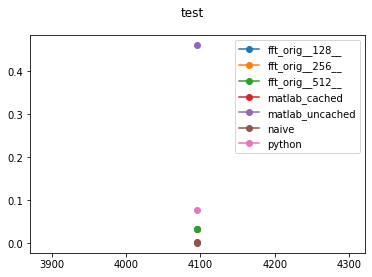

In [9]:
for group in benchmark.groups:
    algorithm_names = set((run.name for run in group.runs))

    fig, ax = plt.subplots()
    fig.suptitle(f"{group.name}")
    for alg_name in sorted(algorithm_names):
        alg_runs = [run for run in group.runs if run.name == alg_name]
        # if alg_name in ["matlab_uncached", "python", "fft_orig__512__"]:
        #     continue
        ax.plot(
            [run.input_area() for run in alg_runs],
            np.array([sum_of_stage_medians(run, all_compute_stages) for run in alg_runs]) / 1e9,
            "o-",
            label=f"{alg_name}"
        )
        ax.legend()